In [47]:
# IMPORTING LIBRARY 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [48]:
# LOADING DATASET
dataset = pd.read_csv('daibetes.csv')
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [49]:
# checking the positive and negative value count 
dataset['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [50]:
# checking the datatypes 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [52]:
# mapping the categorical values yes no as 1 and 0 

dataset['Gender'] = dataset['Gender'].map({'Male':1,'Female':0})
dataset['class'] = dataset['class'].map({'Positive':1,'Negative':0})
dataset['Polyuria'] = dataset['Polyuria'].map({'Yes':1,'No':0})
dataset['Polydipsia'] = dataset['Polydipsia'].map({'Yes':1,'No':0})
dataset['sudden weight loss'] = dataset['sudden weight loss'].map({'Yes':1,'No':0})
dataset['weakness'] = dataset['weakness'].map({'Yes':1,'No':0})
dataset['Polyphagia'] = dataset['Polyphagia'].map({'Yes':1,'No':0})
dataset['Genital thrush'] = dataset['Genital thrush'].map({'Yes':1,'No':0})
dataset['visual blurring'] = dataset['visual blurring'].map({'Yes':1,'No':0})
dataset['Itching'] = dataset['Itching'].map({'Yes':1,'No':0})
dataset['Irritability'] = dataset['Irritability'].map({'Yes':1,'No':0})
dataset['delayed healing'] = dataset['delayed healing'].map({'Yes':1,'No':0})
dataset['partial paresis'] = dataset['partial paresis'].map({'Yes':1,'No':0})
dataset['muscle stiffness'] = dataset['muscle stiffness'].map({'Yes':1,'No':0})
dataset['Alopecia'] = dataset['Alopecia'].map({'Yes':1,'No':0})
dataset['Obesity'] = dataset['Obesity'].map({'Yes':1,'No':0})

# EDA

**Analysing the correlation between independent and dependent variables**
considering independent variables that has high correlation with the dependent variables and less correlation with other variables

<AxesSubplot:>

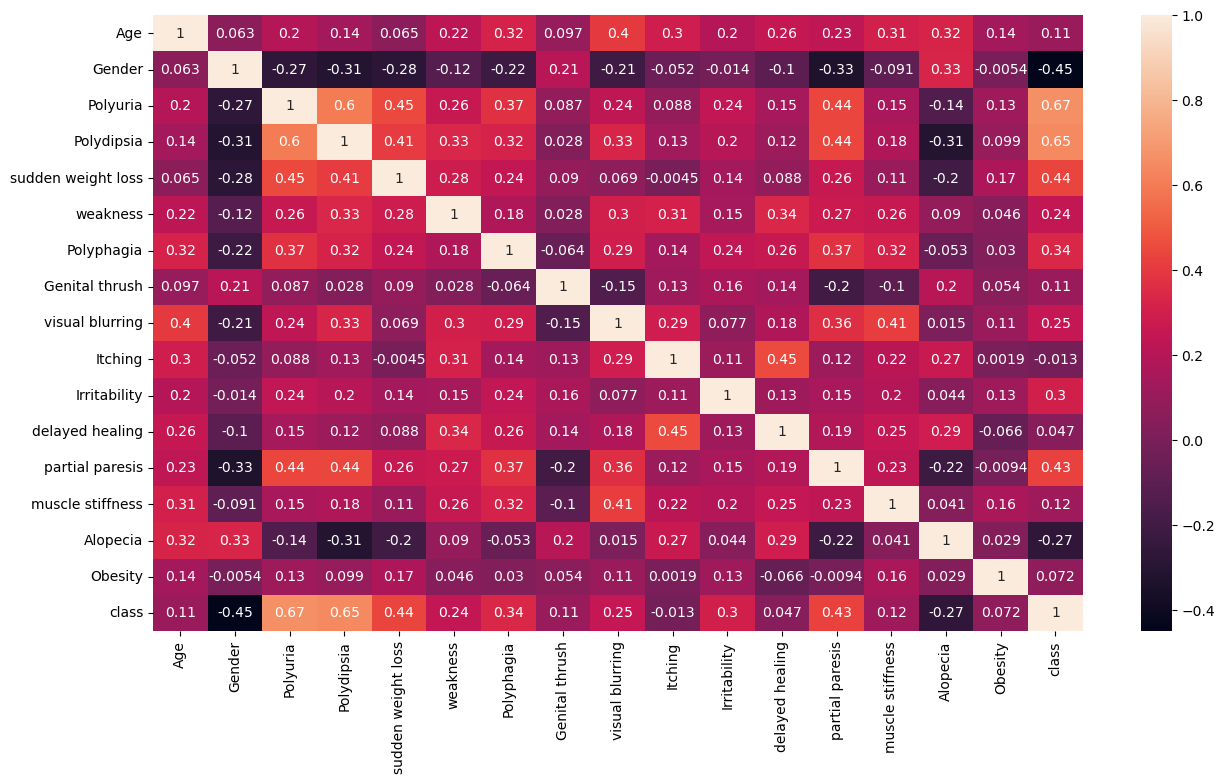

In [53]:
correlation = dataset.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(correlation,annot=True)

**Age distribution**

<AxesSubplot:xlabel='Age', ylabel='Density'>

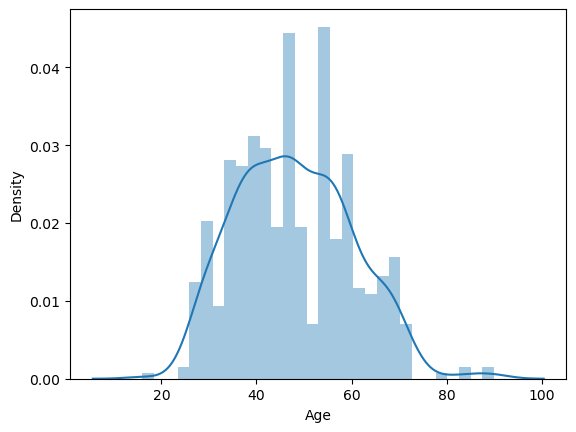

In [54]:
sns.distplot(dataset['Age'],bins=30)  

observation ;
* from the graph we can se the main strength of population are between age 40 to 60

**Age/class(dependent variable)**

<AxesSubplot:xlabel='class', ylabel='Age'>

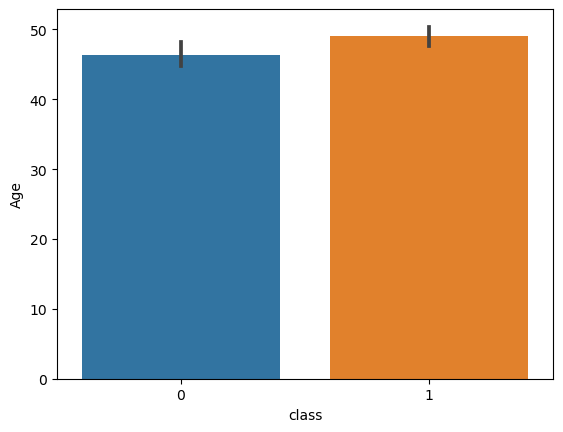

In [55]:
sns.barplot(x='class',y='Age',data=dataset)

**Gender**

<AxesSubplot:xlabel='class', ylabel='count'>

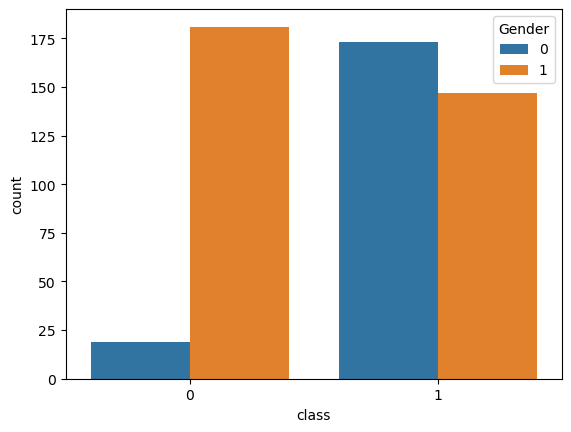

In [56]:
sns.countplot(x='class',data=dataset,hue='Gender')

**Polyuria**

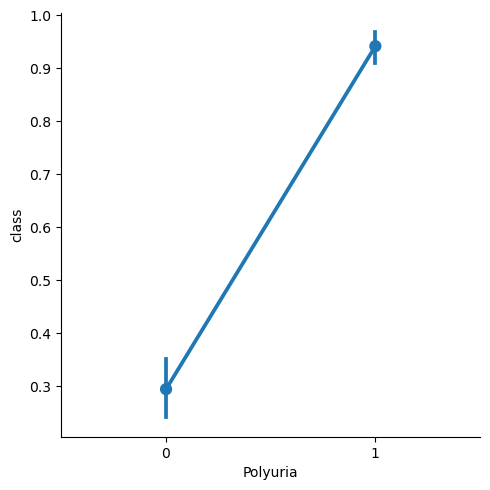

In [57]:
sns.catplot(x="Polyuria", y="class", kind="point", data=dataset)


**Polydipsia**

<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

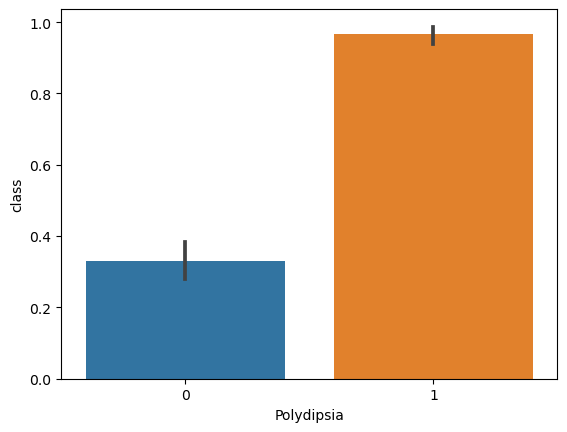

In [58]:
sns.barplot(x='Polydipsia',y='class',data=dataset)

**Sudden weight loss**

sns.countplot(x='class',data=dataset,hue='sudden weight loss')

**Polyphagia**

<AxesSubplot:xlabel='class', ylabel='count'>

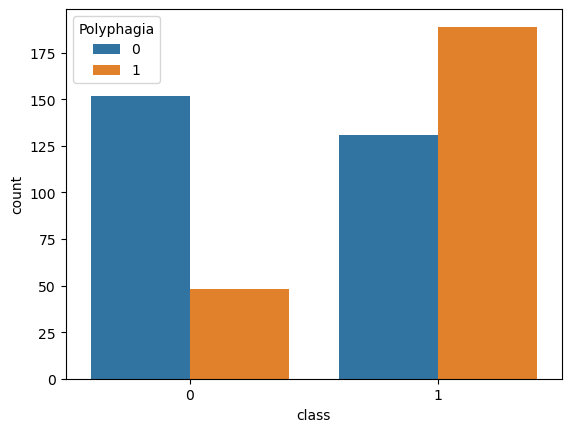

In [59]:
sns.countplot(x='class',data=dataset, hue='Polyphagia')

<AxesSubplot:xlabel='Polyphagia', ylabel='class'>

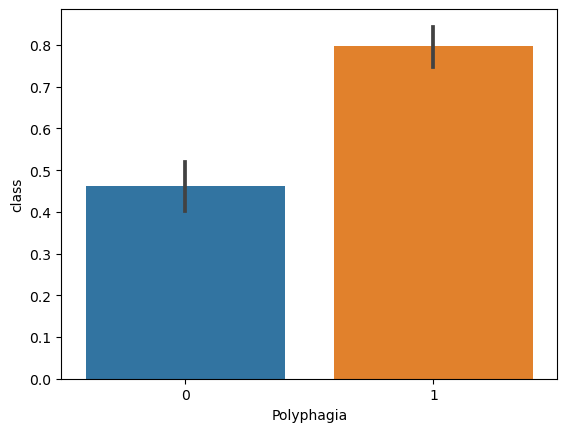

In [60]:
sns.barplot(x='Polyphagia',y='class',data=dataset)

**Genital Thrush**

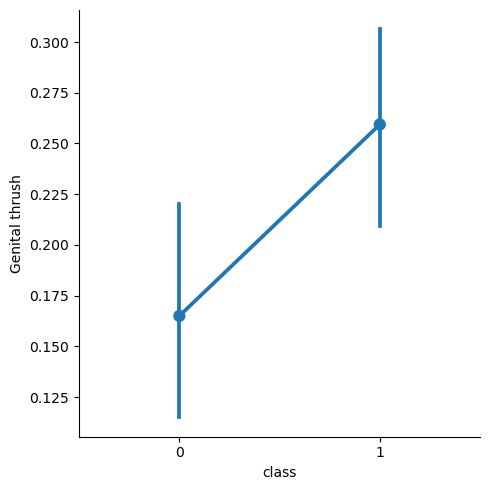

In [61]:
sns.catplot(x='class',y='Genital thrush',kind='point',data=dataset)

**Partial paresis**

<AxesSubplot:xlabel='class', ylabel='partial paresis'>

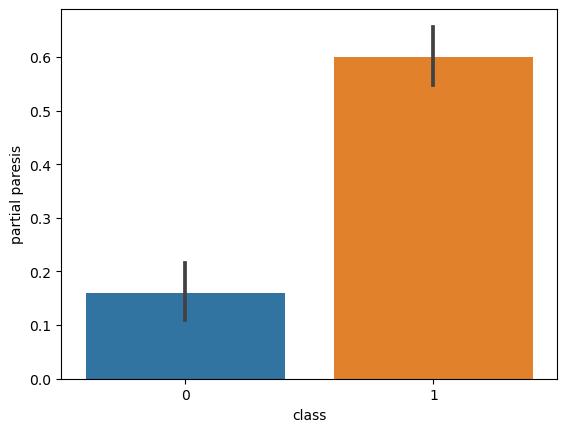

In [62]:
sns.barplot(x='class',y='partial paresis',data=dataset)

**Visual blurring**

<AxesSubplot:xlabel='visual blurring', ylabel='class'>

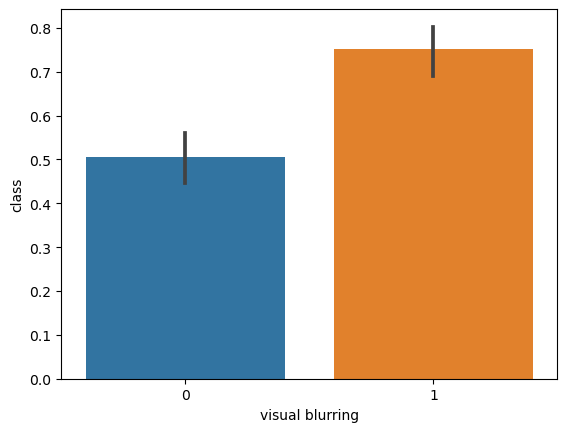

In [63]:
sns.barplot(x="visual blurring", y="class", data=dataset)

**Itching**

<AxesSubplot:xlabel='Itching', ylabel='class'>

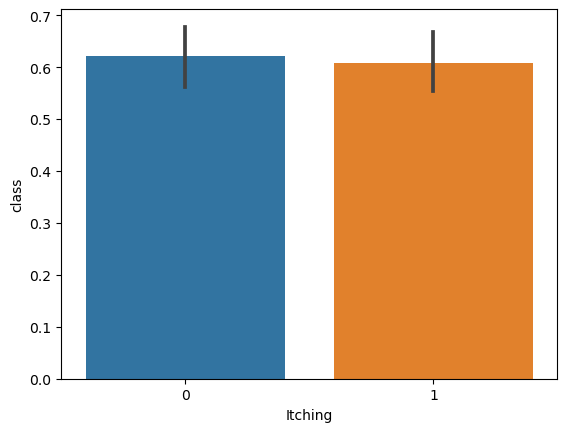

In [64]:
sns.barplot(x="Itching", y="class", data=dataset)

**Irritability**

<AxesSubplot:xlabel='Irritability', ylabel='class'>

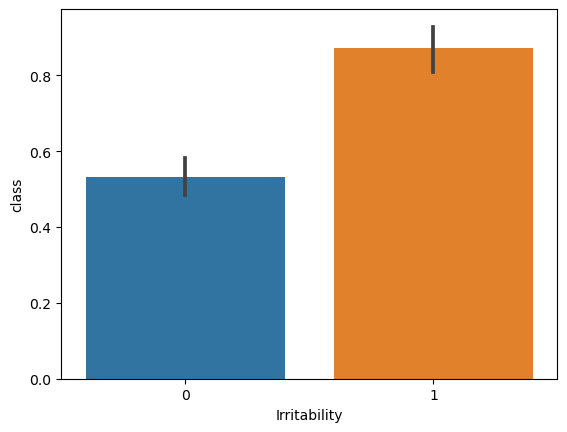

In [65]:
sns.barplot(x='Irritability',y='class',data=dataset)

In [66]:
# defining the feature and label of dataset
X1 = dataset.iloc[:,0:-1]
y1 = dataset.iloc[:,-1]

Interpretations: X1 as feature y1 as label  for chi2 test 

In [67]:
#importing lib to select feature for dataset 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [68]:
# calculating the chi square score of each coloumn 
best_feature = SelectKBest(score_func=chi2,k=10) # where k = 10 means, shortlidt top 10 feature with highest score 
fit = best_feature.fit(X1,y1)                   #fitting the model 
dataset_scores = pd.DataFrame(fit.scores_)     # putting score into dataframes
dataset_cols = pd.DataFrame(X1.columns)       #putting feature names into dataframes 

In [69]:
#concating the features and it's chi score 
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']
featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


interpretations: Here above all the feature are with chi score 

In [70]:
# extracting top 10 feature of dataset 
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


interpretations: Shortlisting top 10 feature on the basis of chi score

In [71]:
# calculating the variance of each column of dataset
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

Interpretations:
The threshold value is calculated based on the formula (p * (1 - p)), where p represents the proportion of the most frequent value in a binary feature. This formula is commonly used as a threshold for binary features when applying variance thresholding.

In [72]:
dataset_scores1 = pd.DataFrame(falls.variances_) #putting variance into dataframe 
dat1 = pd.DataFrame(X1.columns)

In [73]:
high_variance = pd.concat([dataset_scores1,dat1],axis=1) #concating variance and its value into one df 
high_variance.columns=['variance','cols']

In [74]:
high_variance[high_variance['variance']>0.2]  # shortlisting the feature which have variance higher than 0.2

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


observation :Age has highest variation in dataset 

In [75]:
# defing feature and label of data set
X = dataset[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dataset['class']

Interpretation: Using top 10 feature which have higesht chi2 score 

In [76]:
#spliting the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [77]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Logistic Regression 

In [78]:
# importing the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [79]:
#traning the model and checking the accuracy of train model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("Logistic train accuracy is {:.2f} %".format(accuracies.mean()*100))
#print("std is {:.2f} %".format(accuracies.std()*100))

Logistic train accuracy is 84.85 %


In [80]:
# predicting the test data on the model 
pre=lg.predict(X_test)

In [81]:
#checking the accuracy of main model and confusion matrix 
logistic_regression=accuracy_score(pre,y_test)
print("Logistic model accuracy", accuracy_score(pre,y_test))
print("confusion matrix")
print(confusion_matrix(pre,y_test))

Logistic model accuracy 0.8942307692307693
confusion matrix
[[34  5]
 [ 6 59]]


In [82]:
#classification reports of logistic regression
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        39
           1       0.92      0.91      0.91        65

    accuracy                           0.89       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.89      0.89      0.89       104



logistic regression:
* precision : 0.85
* recall: 0.87
* f1-score : 0.86
* accuracy : 0.89

observation : Logistic Regression 
* Train accuracy is 84.85%
* accuracy of Logistic model is 89%

# kNN- Algorithm 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]
print(np.array(knn).mean())

[98.08, 98.08, 98.08, 98.08, 97.12]
98.08


observation :The acuracy of train is 98%

In [84]:
#checking the accuracy of main model and confusion matrix 
knn_clf=accuracy_score(pre3,y_test)
print("knn model accuracy", accuracy_score(pre,y_test))
print("confusion matrix")
print(confusion_matrix(pre3,y_test))

knn model accuracy 0.8942307692307693
confusion matrix
[[39  3]
 [ 1 61]]


In [85]:
# classification report of knn 
from sklearn.metrics import classification_report
print(classification_report(pre3,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.95      0.98      0.97        62

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



knn classification :
* precision : 0.97
* recall: 0.93
* f1-score : 0.95
* accuracy : 0.96

observation : knn 
* Train accuracy is 98.08%
* accuracy of knn  model is 96%

# Decision tree-Algorithm 

In [86]:
# calling the model and using gini as split criterion 
from sklearn.tree import DecisionTreeClassifier   #imporing decesion tree from sklearn 
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
# using cross validation for shuffling the data for better prediction 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("decesion tee accuracy is {:.2f} %".format(accuracies.mean()*100))
# print("std is {:.2f} %".format(accuracies.std()*100))

decesion tee accuracy is 90.88 %


In [88]:
# predicting the y hat
pre5=dc.predict(X_test)

In [89]:
#calculating the main model accuracy and confusion matrix of prediction 
Decisiontress_classifier=accuracy_score(pre5,y_test)
print("Decesion tree",accuracy_score(pre5,y_test))
print("confusion matrix")
print(confusion_matrix(pre5,y_test))

Decesion tree 0.9615384615384616
confusion matrix
[[38  2]
 [ 2 62]]


In [90]:
#classification report of decesion tree 
from sklearn.metrics import classification_report
print(classification_report(pre5,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



Decesion tree classification :
* precision : 0.95
* recall: 0.95
* f1-score : 0.95
* accuracy : 0.97

observation : knn 
* Train accuracy is 91.36%
* accuracy of Decesion tree model is 97.15 %

In [91]:
# Accuracies of all 3 classification model 

In [92]:
print('knn accuracy:', 0.96)
print('Logistic regression accuracy:',logistic_regression)
print('Decision tress accuracy:',Decisiontress_classifier)

knn accuracy: 0.96
Logistic regression accuracy: 0.8942307692307693
Decision tress accuracy: 0.9615384615384616
